In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
df = pd.read_pickle('../../../data/processed/state0/right_android_df.pkl')
print(df.shape)

In [5]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

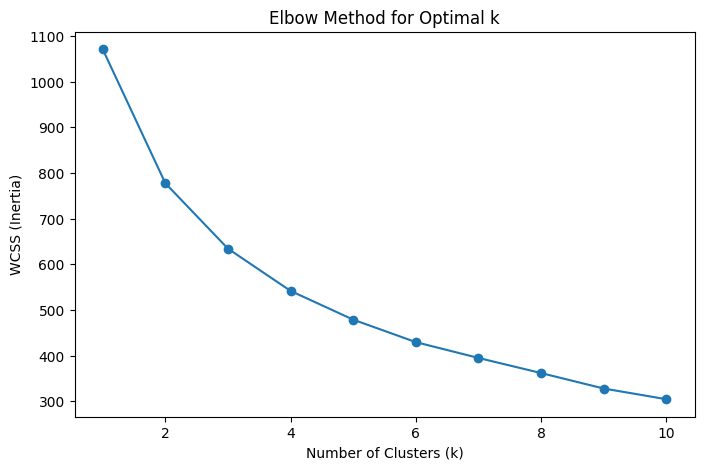

In [6]:
# Use elbow method to get optimal number of clusters
wcss = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

,k,Silhouette Score,Calinski-Harabasz Score
0,2,0.397719,57.002093
1,3,0.221752,51.641332
2,4,0.234066,41.746601
3,5,0.225424,43.529465
4,6,0.236916,43.439068
5,7,0.192988,38.492768
6,8,0.210905,33.277290
7,9,0.236608,34.587456
8,10,0.221888,34.900489


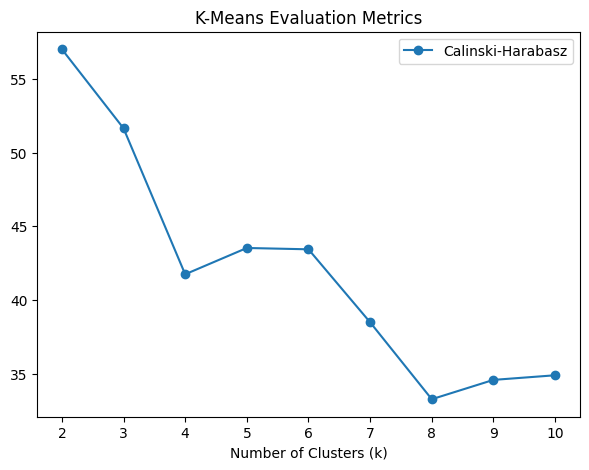

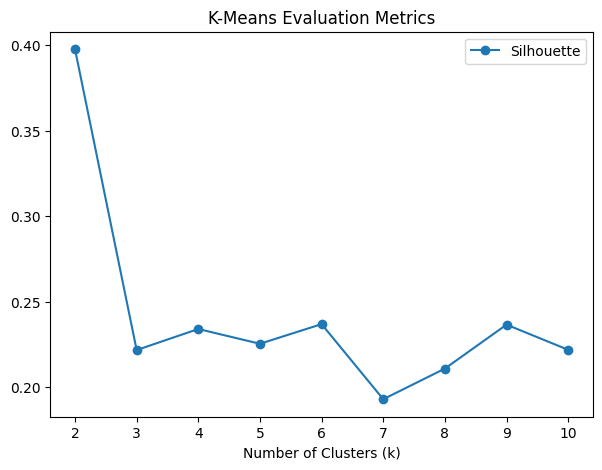

In [8]:
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    
    sil_score = silhouette_score(scaled_df, labels)
    ch_score = calinski_harabasz_score(scaled_df, labels)
    
    results.append({
        'k': k,
        'Silhouette Score': sil_score,
        'Calinski-Harabasz Score': ch_score
    })
    
    scaled_df_clustered = scaled_df.copy()
    scaled_df_clustered['klabel'] = labels

results_df = pd.DataFrame(results)
display(results_df)

plt.figure(figsize=(7, 5))
plt.plot(results_df['k'], results_df['Calinski-Harabasz Score'], marker='o', label='Calinski-Harabasz')
plt.title('K-Means Evaluation Metrics')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(results_df['k'], results_df['Silhouette Score'], marker='o', label='Silhouette')
plt.title('K-Means Evaluation Metrics')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.show()

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


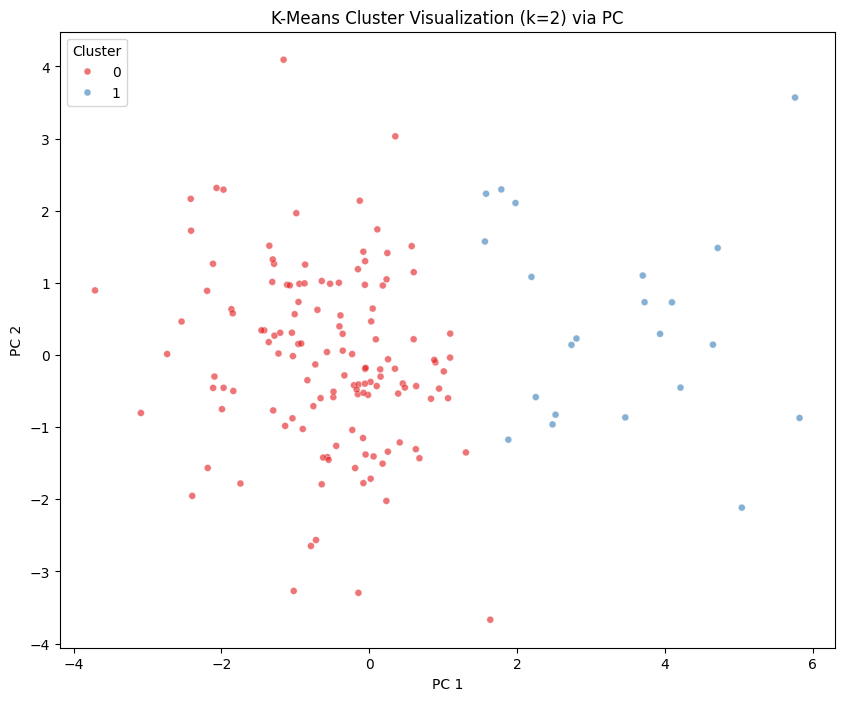

In [9]:
kmeans_final = KMeans(n_clusters=2, n_init=10)
kmeans_final.fit(scaled_df)
final_labels = kmeans_final.labels_

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster_Label'] = final_labels

cluster_centers_pca = pca.transform(kmeans_final.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster_Label',
    data=pca_df, 
    palette='Set1',
    alpha=0.6,
    s=25
)

plt.title('K-Means Cluster Visualization (k=2) via PC')
plt.xlabel(f'PC 1')
plt.ylabel(f'PC 2')
plt.legend(title='Cluster')
plt.show()

In [10]:
features_to_plot = ['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'bearing_angular_change_per_second',
       'bearingAngleChange', 'gps_radius']

kmeans_final = KMeans(n_clusters=2, n_init=10) 
kmeans_final.fit(scaled_df)
final_labels = kmeans_final.labels_

df_clustered = df.copy()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_86492/3818154537.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


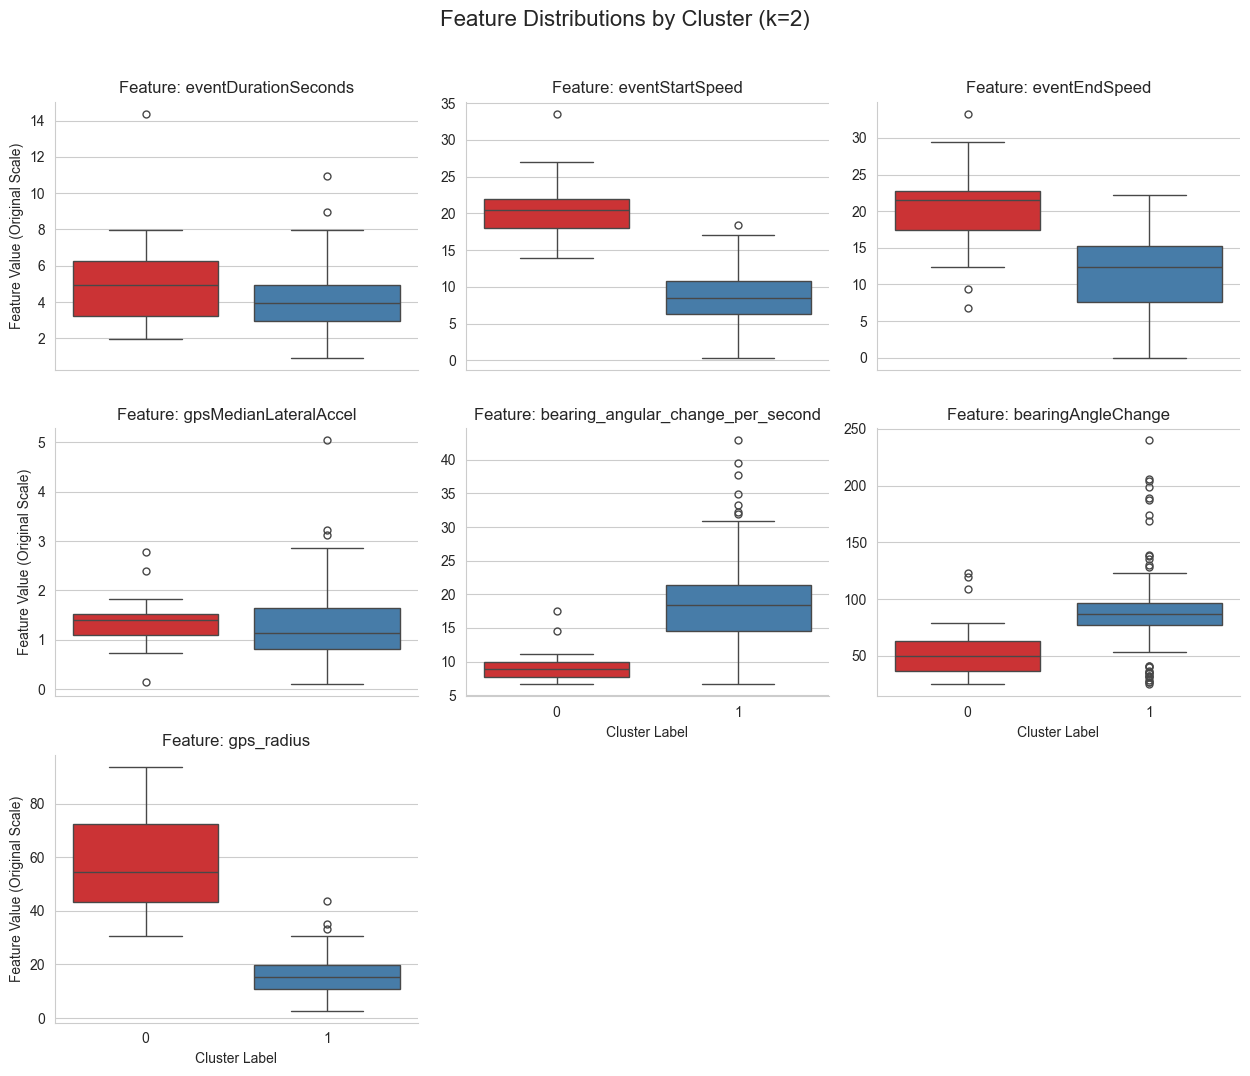

In [11]:

df_clustered['Cluster_Label'] = final_labels
df_clustered['Cluster_Label'] = df_clustered['Cluster_Label'].astype('category')

df_melted = df_clustered[['Cluster_Label'] + features_to_plot].melt(
    id_vars=['Cluster_Label'],
    var_name='Feature',
    value_name='Value'
)

sns.set_style("whitegrid")
g = sns.catplot(
    data=df_melted,
    x='Cluster_Label',
    y='Value',
    col='Feature',
    kind='box', 
    col_wrap=3, 
    palette='Set1',
    sharey=False,
    height=3.5,
    aspect=1.2  
)

g.fig.suptitle('Feature Distributions by Cluster (k=2)', y=1.02, fontsize=16)
g.set_titles("Feature: {col_name}", size=12)
g.set_axis_labels("Cluster Label", "Feature Value (Original Scale)", size=10) 
plt.tight_layout()
plt.show()